In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

df = pd.read_csv("/home/calvin/Desktop/NBA-Games-Predictor/game_stats.csv")

**Data Munging**

Assign a unique id for each game.

In [2]:
rows = df.shape[0]
df['GAMEID'] = np.arange(0, rows, 1)

Insert a new column called Home/Away. "H" denotes home court advantage and "A" denotes away court. 

In [3]:
s = df['MATCHUP'].str.contains('@', regex=False)
df['HOME/AWAY'] = s
df['HOME/AWAY'] = np.where(df['HOME/AWAY'] == True, "A", "H")

In [4]:
df['W/L'] = np.where(df['W/L'] == 'W', 1, 0)
df

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID,HOME/AWAY
0,ATL,01/10/2018,ATL @ DEN,1,239,110,40,80,50.0,12,...,38,44,25,6,4,16,23,13.0,0,A
1,ATL,04/10/2018,ATL vs. PHI,0,240,113,41,98,41.8,13,...,31,39,27,10,3,10,24,-8.0,1,H
2,ATL,04/06/2018,ATL @ WAS,1,239,103,38,79,48.1,11,...,43,50,24,5,5,18,22,6.0,2,A
3,ATL,04/04/2018,ATL vs. MIA,0,239,86,33,90,36.7,9,...,38,48,20,5,6,15,16,-29.0,3,H
4,ATL,04/03/2018,ATL @ MIA,0,240,98,37,88,42.0,13,...,37,49,24,10,1,15,15,-3.0,4,A
5,ATL,04/01/2018,ATL vs. ORL,1,241,94,41,85,48.2,11,...,47,52,33,0,3,14,15,6.0,5,H
6,ATL,03/30/2018,ATL vs. PHI,0,239,91,36,101,35.6,9,...,44,59,24,9,4,16,14,-10.0,6,H
7,ATL,03/28/2018,ATL @ MIN,0,239,114,41,77,53.2,13,...,33,37,26,10,2,20,22,-6.0,7,A
8,ATL,03/25/2018,ATL @ HOU,0,239,99,39,88,44.3,11,...,38,45,18,5,2,13,14,-19.0,8,A
9,ATL,03/23/2018,ATL @ GSW,0,241,94,37,84,44.0,11,...,39,44,24,5,5,11,14,-12.0,9,A


**Partitioning the Data Set**

In [5]:
# create training and testing vars
train_df, test_df = train_test_split(df, test_size=0.2)
print (train_df.shape)
print (test_df.shape)

(1968, 26)
(492, 26)


In [6]:
train_df

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID,HOME/AWAY
782,DET,01/06/2018,DET vs. HOU,1,240,108,38,75,50.7,12,...,30,35,21,8,4,11,15,7.0,782,H
214,BOS,12/16/2017,BOS @ MEM,1,238,102,39,80,48.8,14,...,28,42,21,6,6,16,19,9.0,214,A
229,BOS,11/18/2017,BOS @ ATL,1,240,110,39,82,47.6,16,...,32,41,21,9,6,15,22,11.0,229,A
1078,LAL,03/19/2018,LAL @ IND,0,238,100,38,86,44.2,8,...,33,47,20,4,3,13,18,-10.0,1078,A
276,BKN,01/31/2018,BKN vs. PHI,1,239,116,39,77,50.6,13,...,30,39,19,3,9,11,26,8.0,276,H
289,BKN,01/06/2018,BKN vs. BOS,0,242,85,30,91,33.0,6,...,43,55,11,2,11,16,14,-2.0,289,H
1991,PHX,02/14/2018,PHX @ UTA,0,241,97,34,79,43.0,12,...,36,41,19,5,6,12,25,-10.0,1991,A
2083,POR,01/26/2018,POR @ DAL,1,240,107,39,79,49.4,10,...,44,54,20,4,6,14,17,14.0,2083,A
1228,LAC,10/21/2017,LAC vs. PHX,1,241,130,48,88,54.5,12,...,42,52,26,12,2,12,32,42.0,1228,H
2225,SAS,03/19/2018,SAS vs. GSW,1,240,89,33,82,40.2,8,...,37,48,21,6,5,14,20,14.0,2225,H


In [7]:
test_df

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID,HOME/AWAY
2195,SAC,11/25/2017,SAC vs. LAC,0,241,95,38,83,45.8,11,...,29,37,19,9,8,18,17,-2.0,2195,H
277,BKN,01/30/2018,BKN @ NYK,0,240,95,36,87,41.4,9,...,38,49,15,6,3,17,21,-16.0,277,A
733,DEN,10/27/2017,DEN @ ATL,1,240,105,42,91,46.2,4,...,35,46,25,8,4,11,12,5.0,733,A
1977,PHX,03/23/2018,PHX @ CLE,0,239,95,38,87,43.7,7,...,29,36,24,9,4,17,23,-25.0,1977,A
1885,ORL,10/18/2017,ORL vs. MIA,1,240,116,43,90,47.8,8,...,39,50,22,8,9,14,18,7.0,1885,H
2160,SAC,02/09/2018,SAC vs. POR,0,241,100,38,90,42.2,9,...,31,43,25,5,3,12,19,-18.0,2160,H
359,CHA,02/02/2018,CHA vs. IND,1,241,133,44,83,53.0,15,...,32,43,27,5,2,15,21,7.0,359,H
317,BKN,11/07/2017,BKN @ DEN,0,241,104,38,89,42.7,11,...,39,47,22,12,6,25,16,-8.0,317,A
247,BKN,04/11/2018,BKN @ BOS,0,240,97,37,91,40.7,11,...,34,44,27,10,6,15,12,-13.0,247,A
777,DET,01/17/2018,DET @ TOR,0,240,91,37,88,42.0,10,...,31,42,22,14,7,14,20,-5.0,777,A


In [8]:
train_df.corr()['W/L'].sort_values(ascending=False)

W/L       1.000000
+/-       0.804148
PTS       0.473303
FG%       0.443012
FGM       0.383328
DREB      0.351142
3P%       0.320597
AST       0.315383
REB       0.288447
3PM       0.256423
BLK       0.194290
FTM       0.151549
STL       0.138702
FTA       0.119400
FT%       0.106932
3PA       0.032687
GAMEID    0.008866
MIN       0.004632
OREB     -0.008315
FGA      -0.042455
PF       -0.094080
TOV      -0.111259
Name: W/L, dtype: float64

**Data Exploration**

In [9]:
train_df.describe()

,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID
count,1968.000000,1968.00000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,...,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,0.504065,241.38313,106.287602,39.634146,86.039634,46.159502,10.432927,28.868394,36.050457,16.586382,...,9.698171,33.829268,43.527439,23.251016,7.720528,4.807927,13.677337,19.895833,0.048780,1232.000000
std,0.500111,6.34995,12.035518,5.075565,6.807727,5.504319,3.593839,6.672562,9.208490,5.831096,...,3.616934,5.342306,6.399213,5.208710,2.911357,2.498540,3.763612,4.221236,13.786417,709.501988
min,0.000000,237.00000,69.000000,22.000000,67.000000,28.200000,1.000000,11.000000,5.600000,1.000000,...,1.000000,18.000000,22.000000,9.000000,0.000000,0.000000,3.000000,8.000000,-61.000000,0.000000
25%,0.000000,240.00000,98.000000,36.000000,81.000000,42.400000,8.000000,24.000000,29.600000,12.000000,...,7.000000,30.000000,39.000000,20.000000,6.000000,3.000000,11.000000,17.000000,-9.000000,616.500000
50%,1.000000,240.00000,106.000000,40.000000,86.000000,46.200000,10.000000,29.000000,36.000000,16.000000,...,9.000000,34.000000,43.000000,23.000000,8.000000,5.000000,14.000000,20.000000,1.000000,1236.500000
75%,1.000000,241.00000,114.250000,43.000000,91.000000,49.500000,13.000000,33.000000,42.300000,20.000000,...,12.000000,37.000000,48.000000,27.000000,10.000000,6.000000,16.000000,23.000000,9.000000,1844.250000
max,1.000000,317.00000,149.000000,58.000000,114.000000,66.700000,24.000000,59.000000,66.700000,41.000000,...,23.000000,56.000000,68.000000,40.000000,17.000000,16.000000,29.000000,42.000000,61.000000,2459.000000


**Distribution Analysis**

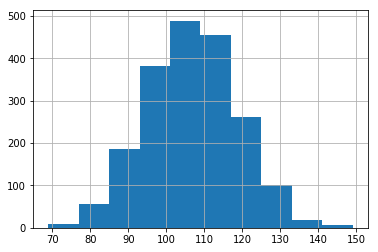

In [10]:
train_df['PTS'].hist()

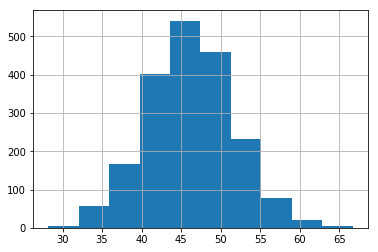

In [11]:
train_df['FG%'].hist()

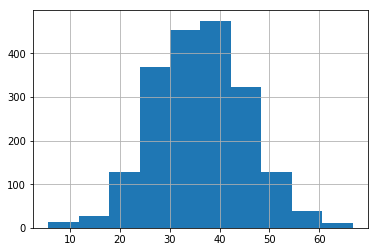

In [12]:
train_df['3P%'].hist()

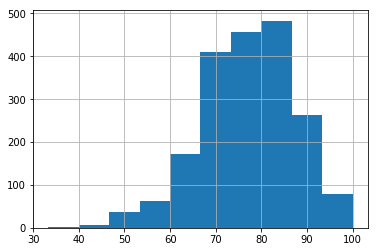

In [13]:
train_df['FT%'].hist()

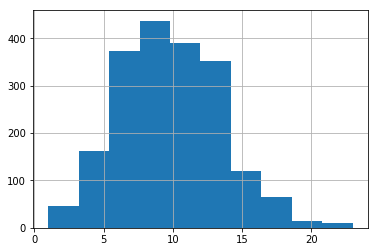

In [14]:
train_df['OREB'].hist()

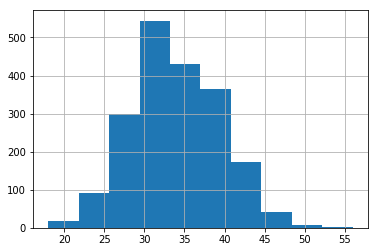

In [15]:
train_df['DREB'].hist()

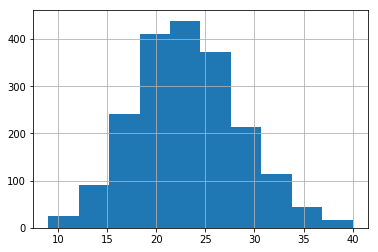

In [16]:
train_df['AST'].hist()

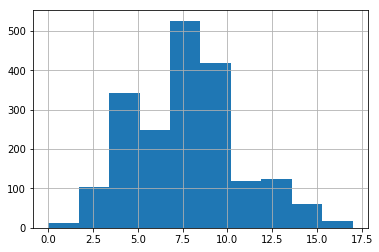

In [17]:
train_df['STL'].hist()

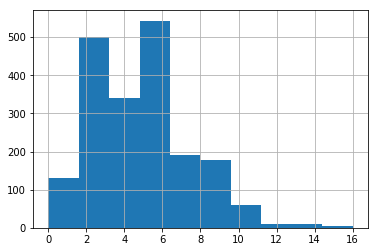

In [18]:
train_df['BLK'].hist()

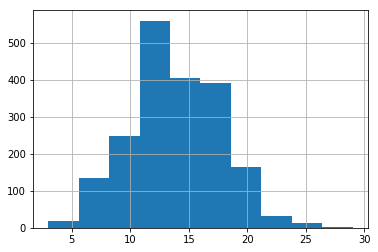

In [19]:
train_df['TOV'].hist()

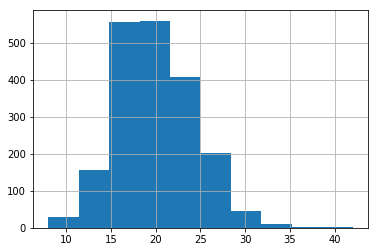

In [20]:
train_df['PF'].hist()

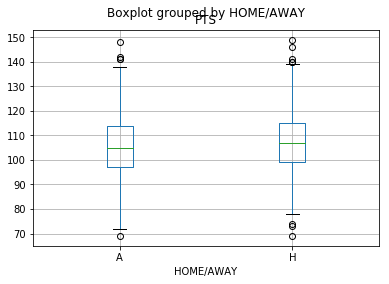

In [21]:
train_df.boxplot(column='PTS', by='HOME/AWAY')

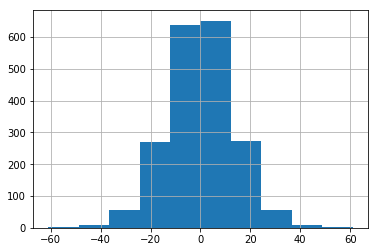

In [22]:
train_df['+/-'].hist()

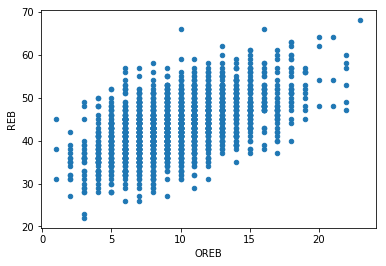

In [23]:
train_df.plot.scatter('OREB', 'REB', s=None, c=None)

In [24]:
temp1 = train_df['HOME/AWAY'].value_counts().sort_index()
temp2 = train_df.pivot_table(values='W/L',index=['HOME/AWAY'],aggfunc=lambda x: x.mean())
print ("Frequency Table for Home/Away Games:")
print (temp1)

print ("\nProbility of winning by home/away games:") 
print (temp2)

Frequency Table for Home/Away Games:
A    982
H    986
Name: HOME/AWAY, dtype: int64

Probility of winning by home/away games:
                W/L
HOME/AWAY          
A          0.425662
H          0.582150


Text(0.5, 1.0, 'Probability of winning by home/away games')

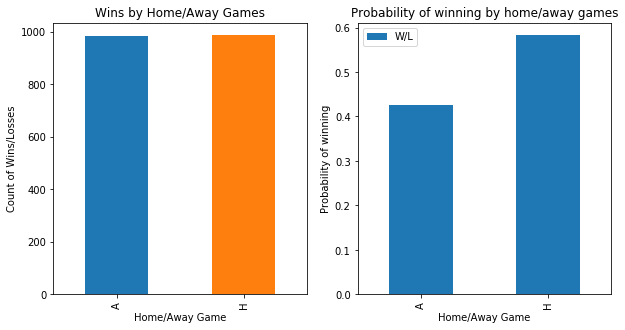

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
ax1.set_xlabel('Home/Away Game')
ax1.set_ylabel('Count of Wins/Losses')
ax1.set_title("Wins by Home/Away Games")
temp1.plot(kind='bar', ax=ax1)

temp2.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Home/Away Game')
ax2.set_ylabel('Probability of winning')
ax2.set_title("Probability of winning by home/away games")

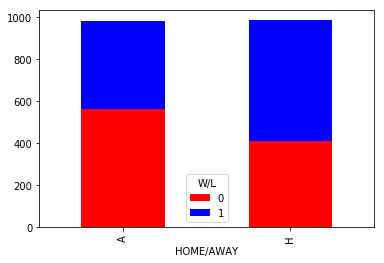

In [26]:
temp3 = pd.crosstab(train_df['HOME/AWAY'], train_df['W/L'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

**Predictive Modelling**

In [27]:
train_df = train_df.copy()

from sklearn.preprocessing import LabelEncoder
var_mod = ['TEAM','DATE','MATCHUP','HOME/AWAY']
le = LabelEncoder()
for i in var_mod:
    train_df.loc[:,i] = le.fit_transform(train_df.loc[:,i].astype('str'))
train_df.dtypes

TEAM           int64
DATE           int64
MATCHUP        int64
W/L            int64
MIN            int64
PTS            int64
FGM            int64
FGA            int64
FG%          float64
3PM            int64
3PA            int64
3P%          float64
FTM            int64
FTA            int64
FT%          float64
OREB           int64
DREB           int64
REB            int64
AST            int64
STL            int64
BLK            int64
TOV            int64
PF             int64
+/-          float64
GAMEID         int64
HOME/AWAY      int64
dtype: object

In [28]:
train_df

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID,HOME/AWAY
782,8,5,428,1,240,108,38,75,50.7,12,...,30,35,21,8,4,11,15,7.0,782,1
214,2,153,105,1,238,102,39,80,48.8,14,...,28,42,21,6,6,16,19,9.0,214,0
229,2,126,96,1,240,110,39,82,47.6,16,...,32,41,21,9,6,15,22,11.0,229,0
1078,13,71,657,0,238,100,38,86,44.2,8,...,33,47,20,4,3,13,18,-10.0,1078,0
276,1,30,89,1,239,116,39,77,50.6,13,...,30,39,19,3,9,11,26,8.0,276,1
289,1,5,73,0,242,85,30,91,33.0,6,...,43,55,11,2,11,16,14,-2.0,289,1
1991,23,44,1189,0,241,97,34,79,43.0,12,...,36,41,19,5,6,12,25,-10.0,1991,0
2083,24,25,1222,1,240,107,39,79,49.4,10,...,44,54,20,4,6,14,17,14.0,2083,0
1228,12,98,643,1,241,130,48,88,54.5,12,...,42,52,26,12,2,12,32,42.0,1228,1
2225,26,71,1343,1,240,89,33,82,40.2,8,...,37,48,21,6,5,14,20,14.0,2225,1


In [29]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5, random_state=None, shuffle=False)
    error = []
    for train, test in kf.split(train_df):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [30]:
outcome_var = 'W/L'
model = LogisticRegression()
#predictor_var = ["TEAM","DATE","MATCHUP","MIN","PTS","FGM","FGA","FG%","3PM","3PA","3P%","FTM","FTA","FT%","OREB","DREB","REB","AST","STL","BLK","TOV","PF","+/-","HOME/AWAY"]
predictor_var = ["PTS","FG%","3P%","FT%","REB","AST","STL","BLK","TOV","PF","+/-","HOME/AWAY"]
classification_model(model, train_df, predictor_var, outcome_var)

Accuracy : 99.238%
Cross-Validation Score : 99.238%


In [31]:
for i in var_mod:
    test_df[:,i] = le.fit_transform(test_df[i])
test_df.dtypes

/home/calvin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TEAM           int64
DATE           int64
MATCHUP        int64
W/L            int64
MIN            int64
PTS            int64
FGM            int64
FGA            int64
FG%          float64
3PM            int64
3PA            int64
3P%          float64
FTM            int64
FTA            int64
FT%          float64
OREB           int64
DREB           int64
REB            int64
AST            int64
STL            int64
BLK            int64
TOV            int64
PF             int64
+/-          float64
GAMEID         int64
HOME/AWAY      int64
dtype: object

In [32]:
#predictions = model.predict(test_df[["TEAM","DATE","MATCHUP","PTS","FGM","FGA","FGA","FG%","3PM","3PA","3P%","FTM","FTA","FT%","OREB","DREB","REB","AST","STL","BLK","TOV","PF","+/-","HOME/AWAY"]])

predictions = model.predict(test_df[["PTS","FG%","3P%","FT%","REB","AST","STL","BLK","TOV","PF","+/-","HOME/AWAY"]])

submission = pd.DataFrame({"GAMEID": test_df["GAMEID"], "W/L": predictions})

submission.to_csv("game_submission.csv", index=False)

In [33]:
test_df[["PTS","FG%","3P%","FT%","REB","AST","STL","BLK","TOV","PF","+/-","HOME/AWAY"]]

,PTS,FG%,3P%,FT%,REB,AST,STL,BLK,TOV,PF,+/-,HOME/AWAY
2195,95,45.8,52.4,88.9,37,19,9,8,18,17,-2.0,1
277,95,41.4,24.3,87.5,49,15,6,3,17,21,-16.0,0
733,105,46.2,20.0,73.9,46,25,8,4,11,12,5.0,0
1977,95,43.7,25.0,60.0,36,24,9,4,17,23,-25.0,0
1885,116,47.8,38.1,75.9,50,22,8,9,14,18,7.0,1
2160,100,42.2,39.1,71.4,43,25,5,3,12,19,-18.0,1
359,133,53.0,45.5,88.2,43,27,5,2,15,21,7.0,1
317,104,42.7,31.4,77.3,47,22,12,6,25,16,-8.0,0
247,97,40.7,27.5,75.0,44,27,10,6,15,12,-13.0,0
777,91,42.0,35.7,46.7,42,22,14,7,14,20,-5.0,0
